<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

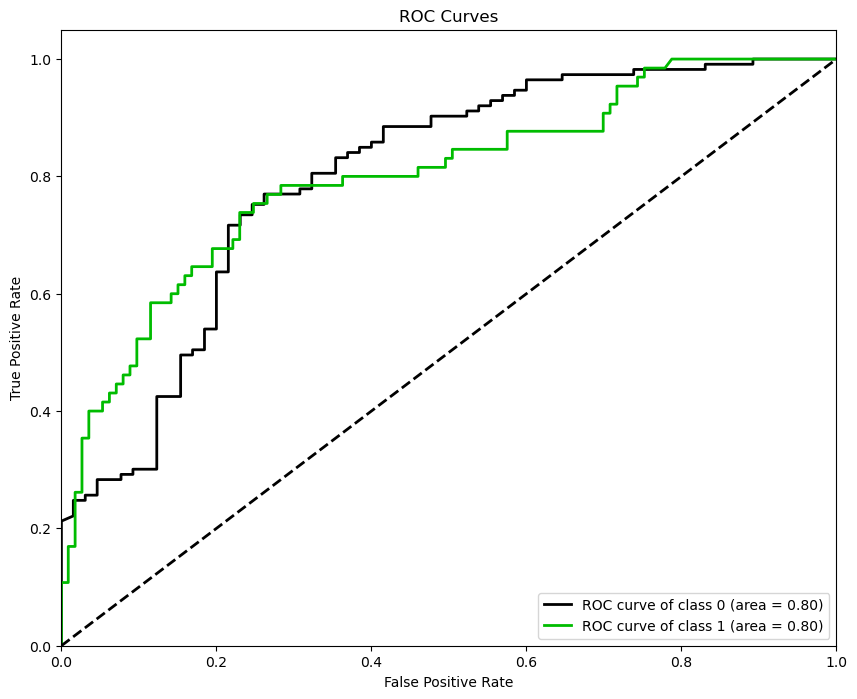

In [68]:
import pandas
import numpy
import seaborn
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, accuracy_score
from sklearn import metrics
import scikitplot 
import warnings
warnings.filterwarnings('ignore')

model_result={}

titanic_data=pandas.read_csv("train.csv")
#remove extra columns which seems of no impact
titanic_data=titanic_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']] 

titanic_data.shape #to check shape - (899,8)
#count of survived and not survived passengers - 0-549, 1-342

titanic_data['Survived'].value_counts()
# seaborn.countplot(x='Survived',data=titanic_data) to represent number of survived in graph

titanic_data.isnull().any() #check if any value of column is null
titanic_data.isnull().sum() #count of null values for each column

titanic_data['Age'].fillna((titanic_data['Age'].mean()),inplace=True) # replace age null values wuth mean of rest

titanic_data.dropna(inplace=True) #drop rows with remaining null values ,True enables the replaces the values in actual dataset.

titanic_data.dtypes # to see datatypes

titanic_data_X=titanic_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']] 
titanic_data_Y=titanic_data['Survived']

X_train,X_test,Y_train,Y_test=train_test_split(titanic_data_X,titanic_data_Y,test_size=0.2)

# seaborn.countplot(x='Pclass',data=X_train) - to see distribution of values

#Below code shows there is peak for both Fare and Age
# seaborn.histplot(X_train['Fare'],color='green')
# seaborn.histplot(X_train['Age'],color='red')

#Z-score Normalization of Age and Fare

age_scaler=StandardScaler()
age_scaler.fit(pandas.DataFrame(X_train['Age']))
X_train['Age']=age_scaler.transform(pandas.DataFrame(X_train['Age']))

Fare_scaler=StandardScaler()
Fare_scaler.fit(pandas.DataFrame(X_train['Fare']))
X_train['Fare']=Fare_scaler.transform(pandas.DataFrame(X_train['Fare']))

#Change sex feature to 0,1

X_train['Sex']= X_train['Sex'].map({'male':1,'female':0})


#assign values to embarked column values

embarked_encoder=preprocessing.LabelEncoder()

embarked_encoder.fit(pandas.DataFrame(X_train['Embarked']))
X_train['Embarked']=embarked_encoder.transform(pandas.DataFrame(X_train['Embarked']))

#Correlation check and column removal

# seaborn.heatmap(X_train.corr())
del X_train['Pclass'] #because there is correlation between Pclass and Fare

#Modify X_test similar to X_train

X_test['Sex']=X_test['Sex'].map({'male':1,'female':0})
del X_test['Pclass']

age_scaler1=StandardScaler()
age_scaler1.fit(pandas.DataFrame(X_test['Age']))
X_test['Age']=age_scaler.transform(pandas.DataFrame(X_test['Age']))

Fare_scaler1=StandardScaler()
Fare_scaler1.fit(pandas.DataFrame(X_test['Fare']))
X_test['Fare']=Fare_scaler.transform(pandas.DataFrame(X_test['Fare']))

label_encoder=preprocessing.LabelEncoder()
label_encoder.fit(pandas.DataFrame(X_test['Embarked']))
X_test['Embarked']=label_encoder.transform(pandas.DataFrame(X_test['Embarked']))

#Logistic Regression model creation
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)

#coefficients of model

coefficients=pandas.concat([pandas.DataFrame(X_train.columns),pandas.DataFrame(numpy.transpose(logistic_regression.coef_))],axis=1)

coefficients.columns=['Feature','Coefficient']
coefficients=coefficients.append({'Feature':'Intercept','Coefficient':logistic_regression.intercept_[0]}, ignore_index=True)

# print(confusion_matrix(Y_test,Y_pred),classification_report(Y_test,Y_pred),accuracy_score(Y_test,Y_pred)) #Model metrices


#classification curves

# scikitplot.estimators.plot_learning_curve(logistic_regression,X_train,Y_train)
# scikitplot.metrics.plot_confusion_matrix(Y_test,Y_pred,normalize=True)

#ROC curve

Y_pred_prob = logistic_regression.predict_proba(X_test)
class1_prob=list()

for i in Y_pred_prob:
    class1_prob.append(i[1])
    
# print(roc_auc_score(Y_test,class1_prob))
# model_result['Logistic_regression(L2)']=roc_auc_score(Y_test,class1_prob)
scikitplot.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])






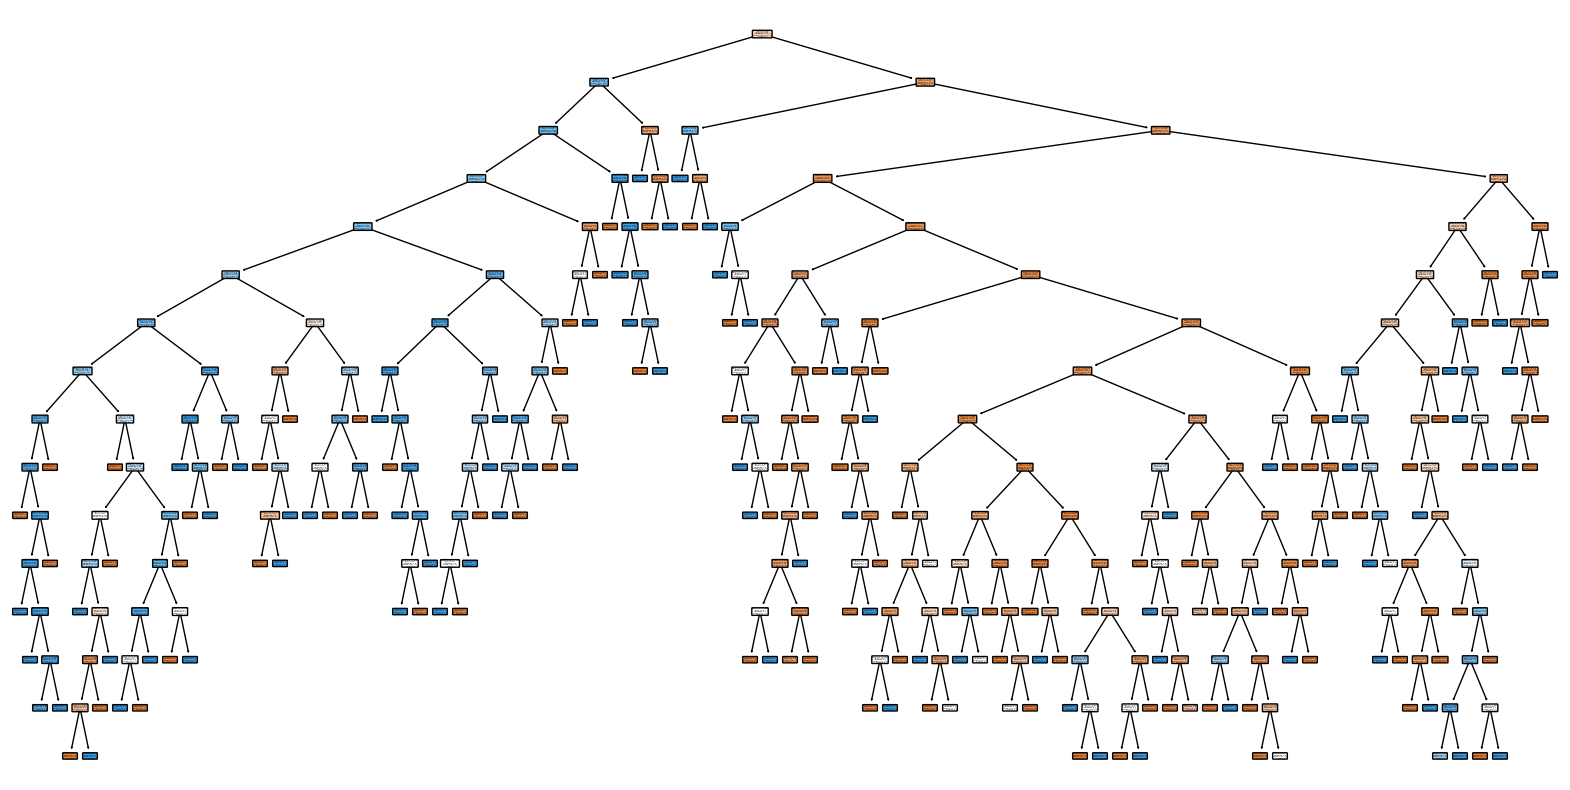

In [95]:
import pandas
import numpy
import seaborn
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, accuracy_score
from sklearn import metrics
import scikitplot 
import warnings
warnings.filterwarnings('ignore')
import graphviz

titanic_data=pandas.read_csv("train.csv")
#remove extra columns which seems of no impact
titanic_data=titanic_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']] 

titanic_data.shape #to check shape - (899,8)
#count of survived and not survived passengers - 0-549, 1-342

titanic_data['Survived'].value_counts()
# seaborn.countplot(x='Survived',data=titanic_data) to represent number of survived in graph

titanic_data.isnull().any() #check if any value of column is null
titanic_data.isnull().sum() #count of null values for each column

titanic_data['Age'].fillna((titanic_data['Age'].mean()),inplace=True) # replace age null values wuth mean of rest

titanic_data.dropna(inplace=True) #drop rows with remaining null values ,True enables the replaces the values in actual dataset.

titanic_data.dtypes # to see datatypes

titanic_data_X=titanic_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']] 
titanic_data_Y=titanic_data['Survived']

X_train,X_test,Y_train,Y_test=train_test_split(titanic_data_X,titanic_data_Y,test_size=0.2)

# seaborn.countplot(x='Pclass',data=X_train) - to see distribution of values

#Below code shows there is peak for both Fare and Age
# seaborn.histplot(X_train['Fare'],color='green')
# seaborn.histplot(X_train['Age'],color='red')

#Z-score Normalization of Age and Fare

age_scaler=StandardScaler()
age_scaler.fit(pandas.DataFrame(X_train['Age']))
X_train['Age']=age_scaler.transform(pandas.DataFrame(X_train['Age']))

Fare_scaler=StandardScaler()
Fare_scaler.fit(pandas.DataFrame(X_train['Fare']))
X_train['Fare']=Fare_scaler.transform(pandas.DataFrame(X_train['Fare']))

#Change sex feature to 0,1

X_train['Sex']= X_train['Sex'].map({'male':1,'female':0})


#assign values to embarked column values

embarked_encoder=preprocessing.LabelEncoder()

embarked_encoder.fit(pandas.DataFrame(X_train['Embarked']))
X_train['Embarked']=embarked_encoder.transform(pandas.DataFrame(X_train['Embarked']))

#Correlation check and column removal

# seaborn.heatmap(X_train.corr())
del X_train['Pclass'] #because there is correlation between Pclass and Fare

#Modify X_test similar to X_train

X_test['Sex']=X_test['Sex'].map({'male':1,'female':0})
del X_test['Pclass']

age_scaler1=StandardScaler()
age_scaler1.fit(pandas.DataFrame(X_test['Age']))
X_test['Age']=age_scaler.transform(pandas.DataFrame(X_test['Age']))

Fare_scaler1=StandardScaler()
Fare_scaler1.fit(pandas.DataFrame(X_test['Fare']))
X_test['Fare']=Fare_scaler.transform(pandas.DataFrame(X_test['Fare']))

label_encoder=preprocessing.LabelEncoder()
label_encoder.fit(pandas.DataFrame(X_test['Embarked']))
X_test['Embarked']=label_encoder.transform(pandas.DataFrame(X_test['Embarked']))

#Decision tree model

decision_tree= tree.DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred=decision_tree.predict(X_test)

# scikitplot.estimators.plot_learning_curve(decision_tree,X_train,Y_train)

# scikitplot.metrics.plot_confusion_matrix(Y_test,Y_pred,normalize=True)
Y_pred_prob=decision_tree.predict_proba(X_test)

class1_prob=list()

for i in Y_pred_prob:
    class1_prob.append(i[1])
# print(roc_auc_score(Y_test,class1_prob))
model_result={}
model_result['DecisionTree(Default)']=roc_auc_score(Y_test,class1_prob)
# scikitplot.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree, filled=True, rounded=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()

#to min overfitting adding max_depth=4
decision_tree_4=tree.DecisionTreeClassifier(max_depth=4)

decision_tree_4.fit(X_train,Y_train)
Y_pred=decision_tree_4.predict(X_test)

# scikitplot.estimators.plot_learning_curve(decision_tree_4,X_train,Y_train)

# scikitplot.metrics.plot_confusion_matrix(Y_test,Y_pred,normalize=True)
Y_pred_prob=decision_tree_4.predict_proba(X_test)

class2_prob=list()

for i in Y_pred_prob:
    class2_prob.append(i[1])
# print(roc_auc_score(Y_test,class2_prob))
model_result={}
model_result['DecisionTree(max_depth=4)']=roc_auc_score(Y_test,class2_prob)
# scikitplot.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])

# dot_data = tree.export_graphviz(decision_tree_4, out_file=None,feature_names=X_train.columns,class_names=['0','1'],filled=True, rounded=True,special_characters=True)
# graph = graphviz.Source(dot_data)
# graph
# plt.figure(figsize=(20,10))
# tree.plot_tree(decision_tree_4, filled=True, rounded=True, feature_names=X_train.columns, class_names=['0', '1'])
# plt.show()


0.7968675842429995


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

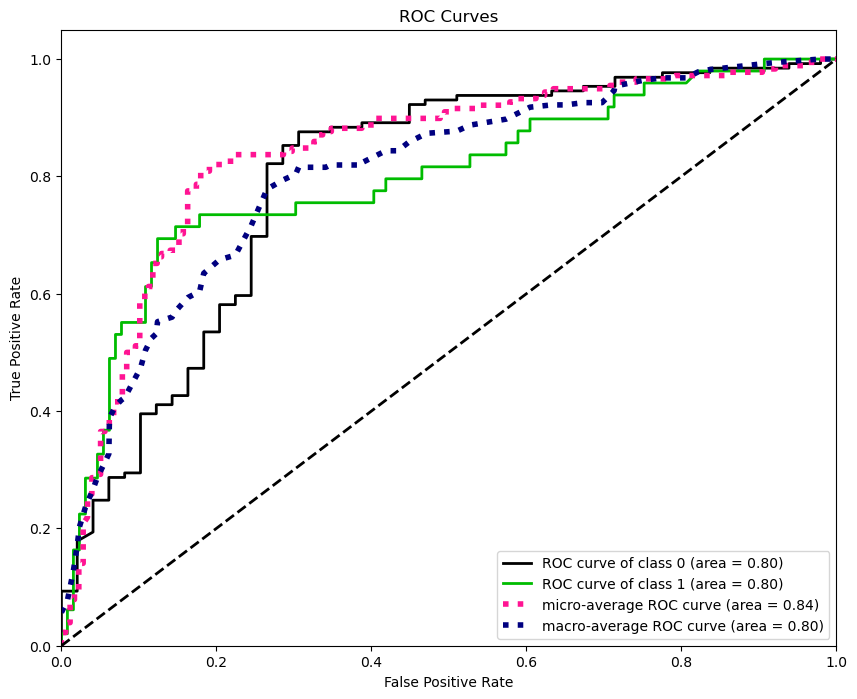

In [16]:
import pandas
import numpy
import seaborn
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, accuracy_score
from sklearn import metrics
import scikitplot 
import warnings
warnings.filterwarnings('ignore')
import graphviz

titanic_data=pandas.read_csv("train.csv")
#remove extra columns which seems of no impact
titanic_data=titanic_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']] 

titanic_data.shape #to check shape - (899,8)
#count of survived and not survived passengers - 0-549, 1-342

titanic_data['Survived'].value_counts()
# seaborn.countplot(x='Survived',data=titanic_data) to represent number of survived in graph

titanic_data.isnull().any() #check if any value of column is null
titanic_data.isnull().sum() #count of null values for each column

titanic_data['Age'].fillna((titanic_data['Age'].mean()),inplace=True) # replace age null values wuth mean of rest

titanic_data.dropna(inplace=True) #drop rows with remaining null values ,True enables the replaces the values in actual dataset.

titanic_data.dtypes # to see datatypes

titanic_data_X=titanic_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']] 
titanic_data_Y=titanic_data['Survived']

X_train,X_test,Y_train,Y_test=train_test_split(titanic_data_X,titanic_data_Y,test_size=0.2)

# seaborn.countplot(x='Pclass',data=X_train) - to see distribution of values

#Below code shows there is peak for both Fare and Age
# seaborn.histplot(X_train['Fare'],color='green')
# seaborn.histplot(X_train['Age'],color='red')

#Z-score Normalization of Age and Fare

age_scaler=StandardScaler()
age_scaler.fit(pandas.DataFrame(X_train['Age']))
X_train['Age']=age_scaler.transform(pandas.DataFrame(X_train['Age']))

Fare_scaler=StandardScaler()
Fare_scaler.fit(pandas.DataFrame(X_train['Fare']))
X_train['Fare']=Fare_scaler.transform(pandas.DataFrame(X_train['Fare']))

#Change sex feature to 0,1

X_train['Sex']= X_train['Sex'].map({'male':1,'female':0})


#assign values to embarked column values

embarked_encoder=preprocessing.LabelEncoder()

embarked_encoder.fit(pandas.DataFrame(X_train['Embarked']))
X_train['Embarked']=embarked_encoder.transform(pandas.DataFrame(X_train['Embarked']))

#Correlation check and column removal

# seaborn.heatmap(X_train.corr())
del X_train['Pclass'] #because there is correlation between Pclass and Fare

#Modify X_test similar to X_train

X_test['Sex']=X_test['Sex'].map({'male':1,'female':0})
del X_test['Pclass']

age_scaler1=StandardScaler()
age_scaler1.fit(pandas.DataFrame(X_test['Age']))
X_test['Age']=age_scaler.transform(pandas.DataFrame(X_test['Age']))

Fare_scaler1=StandardScaler()
Fare_scaler1.fit(pandas.DataFrame(X_test['Fare']))
X_test['Fare']=Fare_scaler.transform(pandas.DataFrame(X_test['Fare']))

label_encoder=preprocessing.LabelEncoder()
label_encoder.fit(pandas.DataFrame(X_test['Embarked']))
X_test['Embarked']=label_encoder.transform(pandas.DataFrame(X_test['Embarked']))

#Naive Bayes model

naive_bayes=GaussianNB()
naive_bayes.fit(X_train,Y_train)
Y_pred=naive_bayes.predict(X_test)
Y_pred_prob=naive_bayes.predict_proba(X_test)

# print(accuracy_score(Y_test,Y_pred))
# scikitplot.estimators.plot_learning_curve(naive_bayes,X_train,Y_train)

# scikitplot.metrics.plot_confusion_matrix(Y_test,Y_pred,normalize=True)

Class1_prob=list()
for i in Y_pred_prob:
    Class1_prob.append(i[1])
print(roc_auc_score(Y_test,Class1_prob))
scikitplot.metrics.plot_roc_curve(Y_test,Y_pred_prob)

